In [141]:
%matplotlib inline
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from nltk.probability import FreqDist 

# librería para realizar peticiones web
import requests

# librería que nos permite extrar texto de un sitio web y convertirlo a string
from bs4 import BeautifulSoup

# librería que contiene las palabras auxiliares
from nltk.corpus import stopwords

# librería para realizar la lematización de palabras
from nltk.stem import WordNetLemmatizer

## obtención del texto y limpieza del mismo

In [142]:
# tema que se buscará
tema = 'Natural language processing'

# enlace para acceder al contenido de la Wikipedia
response = requests.get(f'http://en.wikipedia.org/wiki/{tema}')

# transformar el sitio web a texto plano
soup = BeautifulSoup(response.text)

# obtener el texto por párrafos
parrafos = soup.find_all('p')

# obtener solo el primer parrafo
texto = parrafos[0].text

# mostrar el texto con el que trabajaremos
print(texto)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. 



In [143]:
# se crea una variable que contenga todas las palabras auxiliares
palabras_auxiliares = set(stopwords.words('english')) 

# mostramos las palabras auxiliares
print(palabras_auxiliares) 

{'down', 'my', 'these', 'isn', "needn't", 'between', 'then', 'her', 'into', 'more', 'same', 'wouldn', 'up', 'she', 'haven', 'his', 'he', 'they', 'theirs', 'and', 'will', "aren't", 'until', 'have', 'any', 't', 'am', 'their', 'him', 'from', 'above', "isn't", 'ma', 'has', "hadn't", 'were', 'does', "hasn't", 'just', 'yourselves', 'of', "wasn't", "mustn't", 'this', 'i', 'not', 'while', 'itself', "mightn't", 'because', "you're", 'before', "should've", "weren't", 'all', "don't", "you'll", "shouldn't", 've', 'me', "won't", 'what', 'where', 'why', "it's", 'at', 'through', 'shouldn', 'under', 'didn', 'hasn', 'own', 'as', 'mightn', 'yours', 'll', "you'd", 'so', 'yourself', 'by', 'in', 'is', 'now', 'our', "couldn't", 'on', 'for', 'after', "wouldn't", 'that', 'no', 'being', 'too', 'doesn', 'you', 'off', 'there', 'than', 'o', 'nor', 'needn', 'your', 'an', 's', 'or', 'ain', 'during', 'a', 'over', 'once', 'been', 'ourselves', 'do', 'its', 'out', 'such', 'can', "that'll", 'about', 'hers', 'themselves',

In [144]:
#  \w+ acepta cualquier caracter que se encuentre en el rango de [a-zA-Z0-9_]
# aplicamos una expresión regular que haga
texto_en_tokens = nltk.regexp_tokenize(texto, '\w+') 

# transformar palabras a minúsculas para que hagan match con las palabras auxiliares
texto_en_tokens = np.array([palabra.lower() for palabra in texto_en_tokens])

# quitamos las palabras auxiliares mediante un bucle que las busque en el texto
texto_en_tokens = np.array([palabra for palabra in texto_en_tokens if not palabra in palabras_auxiliares])

print(f'Longitud del texto en tokens: {len(texto_en_tokens)}')

Longitud del texto en tokens: 47


## lematización

In [145]:
# guardamos en una variable el método WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# arreglo para guardar los tokens ya pasados por el metodo lemmatize
tokens_lematizados = np.array([lemmatizer.lemmatize(token) for token in texto_en_tokens])

## POS tagging

In [146]:
# aplicar pos taging a los tokens
pos_tags = nltk.pos_tag(texto_en_tokens)

## resultados

In [147]:
# crear un dataframe para guardar nuestros resultados
dataframe_lematizacion = pd.DataFrame()

# crear una columna para cada uno con su respectivo resultado
dataframe_lematizacion['token'] = texto_en_tokens
dataframe_lematizacion['lematizacion'] = tokens_lematizados
dataframe_lematizacion['pos_tagging'] = pos_tags
dataframe_lematizacion['pos_tags'] = dataframe_lematizacion['pos_tagging'].apply(lambda x: x[1])

dataframe_lematizacion

,token,lematizacion,pos_tagging,pos_tags
0,natural,natural,"(natural, JJ)",JJ
1,language,language,"(language, NN)",NN
2,processing,processing,"(processing, NN)",NN
3,nlp,nlp,"(nlp, JJ)",JJ
4,subfield,subfield,"(subfield, NN)",NN
5,linguistics,linguistics,"(linguistics, NNS)",NNS
6,computer,computer,"(computer, NN)",NN
7,science,science,"(science, NN)",NN
8,artificial,artificial,"(artificial, JJ)",JJ
9,intelligence,intelligence,"(intelligence, NN)",NN


In [148]:
# agrupar por post_tags para poder graficar
tag_counts = dataframe_lematizacion.groupby('pos_tags')['token'].count()

Text(0, 0.5, 'frequency')

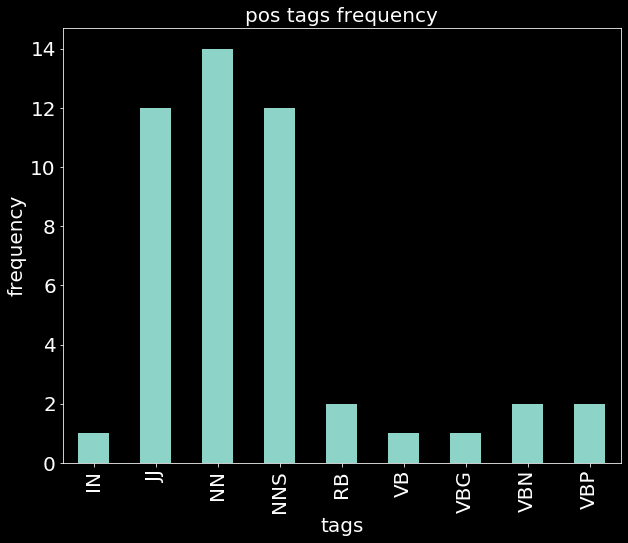

In [150]:
# graficar los resultados
plt.style.use('dark_background')
plt.figure(figsize=(10,8)) # tamaño de la figura
tag_counts.plot(kind='bar', fontsize=20) # qué se graficará y tipo de gráfica 
plt.title('pos tags frequency', fontsize=20) # título del gráfico
plt.xlabel('tags', fontsize=20) # etiqueta del eje x
plt.ylabel('frequency', fontsize=20) # etiqueta del eje y